[참고 블로그](https://jfun.tistory.com/111)

nonlinear decision boundary, 즉 비선형 분류 문제를 해결하기 위한 kernel SVM을 실습해봅시다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(100, 2) [1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


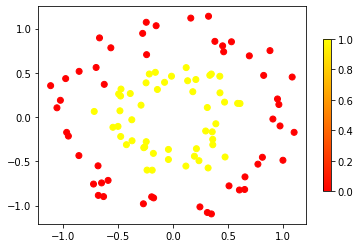

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.1) # factor = R1/R2, noise: svd

print(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

X :  각 점의 좌표를 의미   
y : label

In [ ]:
print(X[:,0]) #x1 좌표
print(X[:,1]) #x2 좌표
print(y.shape)

선형 함수로 두 클래스 구분은 불가하지만, 중심으로부터의 거리로 구분할 수 있을 것 같습니다. 이에 $$x_1^2 + x_2^2$$ 를 새로운 feature로 추가해 보겠습니다.

In [6]:
new_col = X[:,0]**2 + X[:,1]**2
X_new = np.c_[X,new_col] #np_c 로 column 하나 추가

display(X_new.shape, X_new[:5])

(100, 3)

array([[-0.23766012, -0.59901286,  0.41529874],
       [ 0.96383933,  0.14210283,  0.94917947],
       [-1.11613286,  0.35514126,  1.37187787],
       [-0.47494006,  0.31683142,  0.32595021],
       [-0.85856119, -0.43509857,  0.92643808]])

아래와 같이 classification이 가능하게 되었습니다.

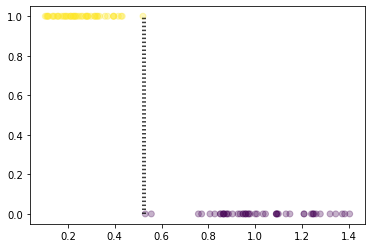

In [11]:
plt.scatter(new_col, y, c=y, alpha=0.3)
plt.vlines([new_col[y==1].max(), new_col[y==0].min()], 0, 1, linestyles='dotted')

직접 feature 적용 여부에 따른 정확도 측정으로도 비교를 해보겠습니다.

In [12]:
# x1, x2 적용
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)

score = model.score(X,y)
display(score)

0.53

In [13]:
#  (x^1+x^2)  1가지 feature적용
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(new_col.reshape(-1,1), y)

score = model.score(new_col.reshape(-1,1),y)
display(score)

0.98

In [14]:
# x1, x2, x^1+x^2 3가지 feature 적용
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_new, y)

score = model.score(X_new,y)
display(score)

0.99

iris dataset을 들고 와서 제대로 해보겠습니다.

SVC에서 multiclass SVM, kernel SVM 다 포함되어 있는 것 같네요.

3 class multiclass classification입니다.

In [15]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정
y = iris.target

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 모델 정의
model = SVC()

# 학습시키기
model.fit(X_train, y_train)

# 평가하기
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display(score1, score2)

0.8571428571428571

0.7368421052631579

In [17]:
#pip install mglearn

     |████████████████████████████████| 540 kB 8.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=60ca450070a72dc4a473a40ddac5d7bf68d41eb9d3b4d6229514c06b2de42ec2
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


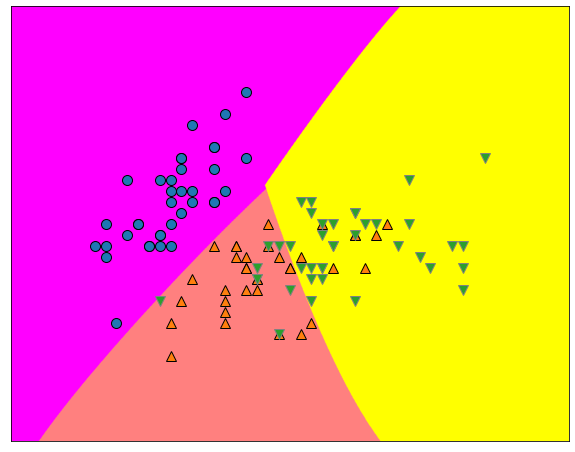

In [18]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, cm='spring')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

C값을 줄여보자.-> underfitting 됨

0.6578947368421053

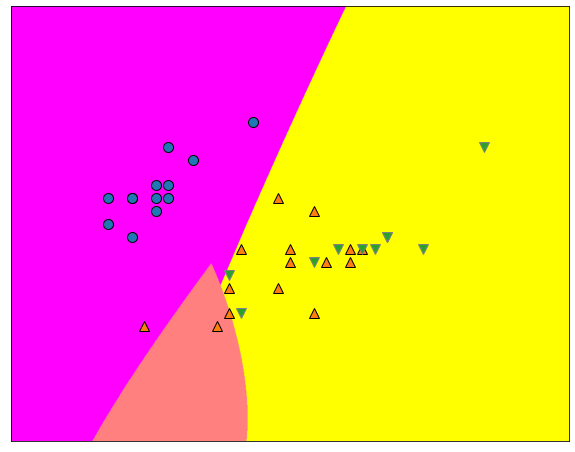

In [19]:
# 모델 정의
model = SVC(C=0.1) # C값에 민감하게 그래프가 변한다.

# 학습시키기
model.fit(X_train, y_train)

# 평가하기
score = model.score(X_test, y_test)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

C값을 늘여보자.-> overfitting 됨

0.7105263157894737

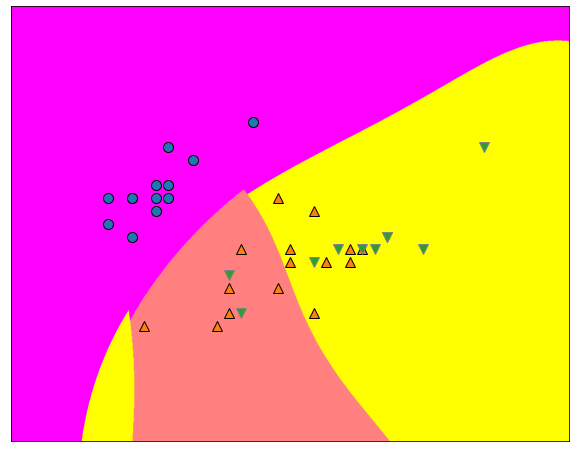

In [21]:
# 모델 정의
model = SVC(C=200) # C값에 민감하게 그래프가 변한다.

# 학습시키기
model.fit(X_train, y_train)

# 평가하기
score = model.score(X_test, y_test)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)